# 04 - Structural Alignment

## Summary

We have aligned all predictions against each other. We display the results here, studying three different aspects:

- The global TM-score distribution.
- The relationship between sequence identity and TM-score.
- The structural clustering of Nitrogenases.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import numpy as np
plt.rcParams['svg.fonttype'] = 'none'

## DDKK

In [2]:
ddkk_usalign = pd.read_csv(
    '../data/ddkk-tm-score.csv', sep='\s+', header=None, 
    names=['pdb1', 'pdb2', 'tm-score', 'tm-score2', 'rmsd', 'id1', 'id2', 'idali', 'l1', 'l2', 'lali']
)
ddkk_usalign['pdb1'] = ddkk_usalign['pdb1'].apply(lambda x: x.split('.')[0])
ddkk_usalign['pdb2'] = ddkk_usalign['pdb2'].apply(lambda x: x.split('.')[0])

**Figure 1**: Distribution of TM-scores across the DDKK all-vs-all structural alignment.

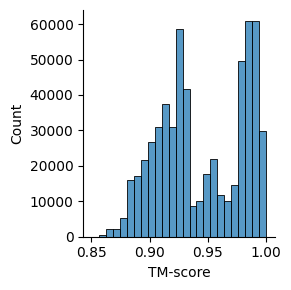

In [3]:
g = sns.displot(
    data=ddkk_usalign, x='tm-score2', height=3, aspect=1.0, bins=25
)
g.set_xlabels('TM-score')
g.savefig('../figures/ddkk-histogram-tmscore.svg')
g.savefig('../figures/ddkk-histogram-tmscore.png', dpi=300)

**Figure 2**: Distribution of RMSD across the DDKK all-vs-all structural alignment.

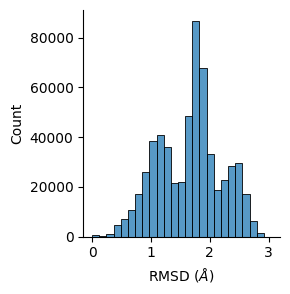

In [4]:
g = sns.displot(
    data=ddkk_usalign, x='rmsd', height=3, aspect=1.0, bins=25
)
g.set_xlabels('RMSD ($\AA$)')
g.savefig('../figures/ddkk-histogram-rmsd.svg')
g.savefig('../figures/ddkk-histogram-rmsd.png', dpi=300)

**Figure 3**: Joint distribution of TM-score (x-axis) and sequence identity (y-axis)

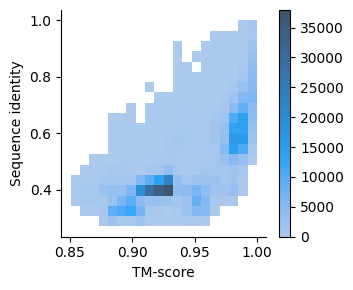

In [5]:
g = sns.displot(y='idali', x='tm-score2', data=ddkk_usalign, height=3, bins=20, cbar=True, aspect=1.2)
g.set_ylabels('Sequence identity')
g.set_xlabels('TM-score')
g.savefig('../figures/ddkk-histogram2D-tmscore-idali.svg')
g.savefig('../figures/ddkk-histogram2D-tmscore-idali.png', dpi=300)

**Figure 4**: Joint distribution of RMSD (x-axis) and sequence identity (y-axis)

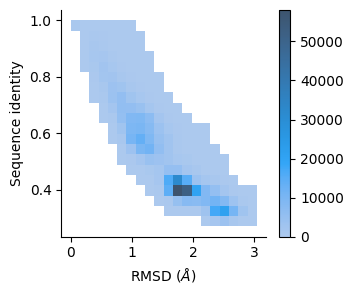

In [6]:
g = sns.displot(y='idali', x='rmsd', data=ddkk_usalign, height=3, bins=20, cbar=True, aspect=1.2)
g.set_ylabels('Sequence identity')
g.set_xlabels('RMSD ($\AA$)')
g.savefig('../figures/ddkk-histogram2D-rmsd-idali.svg')
g.savefig('../figures/ddkk-histogram2D-rmsd-idali.png', dpi=300)

To study the clustering, we will start by considering hierarchical clustering, generated by the clustermap method. First, we need to pivot the table.

In [7]:
ddkk_usalign_matrix = ddkk_usalign.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='tm-score2').dropna()
ddkk_usalign_matrix

pdb1,nsdb-000001,nsdb-000002,nsdb-000003,nsdb-000004,nsdb-000005,nsdb-000006,nsdb-000007,nsdb-000008,nsdb-000009,nsdb-000010,...,nsdb-000760,nsdb-000761,nsdb-000762,nsdb-000763,nsdb-000764,nsdb-000765,nsdb-000766,nsdb-000767,nsdb-000768,nsdb-000769
pdb2,,,,,,,,,,,,,,,,,,,,,
nsdb-000001,1.0000,0.9869,0.9912,0.9889,0.9243,0.9780,0.8760,0.9053,0.9255,0.9211,...,0.9899,0.9190,0.8920,0.9783,0.9927,0.9236,0.8865,0.9227,0.9895,0.9799
nsdb-000002,0.9790,1.0000,0.9834,0.9806,0.9219,0.9691,0.8691,0.8980,0.9210,0.9158,...,0.9862,0.9193,0.8880,0.9709,0.9850,0.9229,0.8781,0.9177,0.9879,0.9731
nsdb-000003,0.9882,0.9884,1.0000,0.9856,0.9251,0.9729,0.8741,0.9004,0.9237,0.9199,...,0.9915,0.9214,0.8878,0.9755,0.9942,0.9263,0.8818,0.9218,0.9906,0.9774
nsdb-000004,0.9934,0.9930,0.9931,1.0000,0.9290,0.9788,0.8815,0.9083,0.9306,0.9254,...,0.9926,0.9250,0.8969,0.9811,0.9945,0.9285,0.8919,0.9269,0.9923,0.9803
nsdb-000005,0.9106,0.9155,0.9142,0.9112,1.0000,0.9048,0.8662,0.8997,0.9696,0.9420,...,0.9138,0.9885,0.8854,0.9092,0.9112,0.9981,0.8746,0.9425,0.9137,0.9054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nsdb-000765,0.9072,0.9138,0.9126,0.9080,0.9952,0.9014,0.8631,0.8965,0.9649,0.9404,...,0.9119,0.9867,0.8832,0.9074,0.9088,1.0000,0.8706,0.9403,0.9112,0.9031
nsdb-000766,0.9682,0.9665,0.9658,0.9696,0.9695,0.9657,0.9635,0.9895,0.9725,0.9714,...,0.9684,0.9672,0.9794,0.9676,0.9663,0.9679,1.0000,0.9706,0.9673,0.9651
nsdb-000767,0.9455,0.9479,0.9474,0.9454,0.9804,0.9413,0.8988,0.9318,0.9802,0.9935,...,0.9483,0.9790,0.9152,0.9427,0.9442,0.9811,0.9107,1.0000,0.9464,0.9411


In [9]:
reference = pd.read_csv('../structures/reference.csv')
reference_types = reference[['id', 'clade']].set_index('id').to_dict()['clade']

**Figure 5**: DDKK-structural alignment clustermap, based on TM-scores. Each point of the matrix represents the alignment of a protein against another protein.

/home/bcz/miniconda3/envs/e24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/bcz/miniconda3/envs/e24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


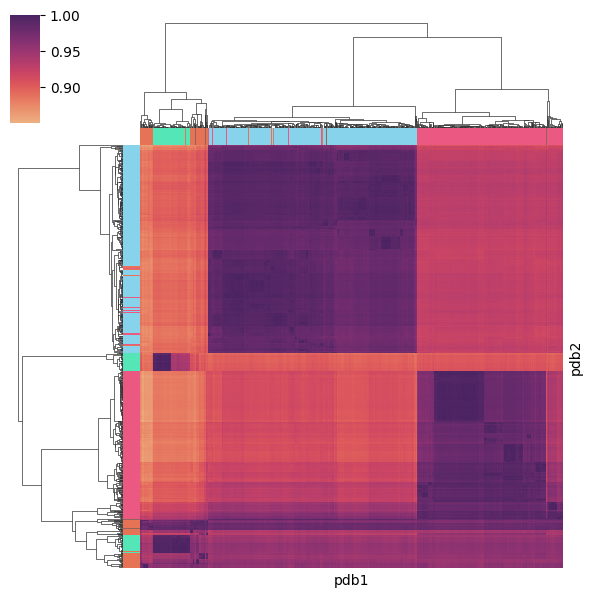

In [17]:
ddkk_usalign_matrix = ddkk_usalign.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='tm-score2').dropna()

palette = {
    'nif-i': '#EB5882',
    'nif-ii': '#86D3EB',
    'nif-iii': '#E67355',
    'an': '#55E6B8',
    'other': '#8F655A'
}
colors_rows = [palette[reference_types[x]] for x in ddkk_usalign_matrix.index.to_list()]
colors_columns = [palette[reference_types[x]] for x in ddkk_usalign_matrix.columns]

g = sns.clustermap(
    data=ddkk_usalign_matrix, figsize=(6, 6), col_cluster=True, xticklabels=False, yticklabels=False,
    row_colors=colors_rows, col_colors=colors_columns, cmap='flare'
)
g.savefig('../figures/ddkk-clustermap-tmscore.svg')
g.savefig('../figures/ddkk-clustermap-tmscore.png', dpi=300)

**Figure 6**: DDKK-structural alignment clustermap, based on RMSD. Each point of the matrix represents the alignment of a protein against another protein.

In [8]:
ddkk_usalign

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali
0,nsdb-000001,nsdb-000001,1.0000,1.0000,0.00,1.000,1.000,1.000,1974,1974,1974
1,nsdb-000002,nsdb-000001,0.9790,0.9869,1.35,0.596,0.601,0.603,1990,1974,1966
2,nsdb-000003,nsdb-000001,0.9882,0.9912,0.96,0.633,0.635,0.638,1980,1974,1966
3,nsdb-000004,nsdb-000001,0.9934,0.9889,1.02,0.645,0.642,0.646,1965,1974,1962
4,nsdb-000005,nsdb-000001,0.9106,0.9243,1.92,0.344,0.350,0.372,2004,1974,1856
...,...,...,...,...,...,...,...,...,...,...,...
587661,nsdb-000765,nsdb-000769,0.9031,0.9278,1.79,0.364,0.374,0.397,2010,1956,1842
587662,nsdb-000766,nsdb-000769,0.9651,0.8918,1.69,0.457,0.422,0.467,1806,1956,1768
587663,nsdb-000767,nsdb-000769,0.9411,0.9268,1.59,0.382,0.376,0.401,1926,1956,1834
587664,nsdb-000768,nsdb-000769,0.9820,0.9910,1.17,0.573,0.579,0.580,1974,1956,1952


In [10]:
reference_types

{'nsdb-000001': 'nif-ii',
 'nsdb-000002': 'nif-ii',
 'nsdb-000003': 'nif-iii',
 'nsdb-000004': 'nif-ii',
 'nsdb-000005': 'nif-i',
 'nsdb-000006': 'nif-ii',
 'nsdb-000007': 'nif-iii',
 'nsdb-000008': 'nif-iii',
 'nsdb-000009': 'nif-i',
 'nsdb-000010': 'nif-i',
 'nsdb-000011': 'nif-i',
 'nsdb-000012': 'nif-ii',
 'nsdb-000013': 'nif-ii',
 'nsdb-000014': 'nif-i',
 'nsdb-000015': 'nif-i',
 'nsdb-000016': 'nif-i',
 'nsdb-000017': 'nif-iii',
 'nsdb-000018': 'nif-i',
 'nsdb-000019': 'nif-i',
 'nsdb-000020': 'nif-ii',
 'nsdb-000021': 'nif-ii',
 'nsdb-000022': 'nif-ii',
 'nsdb-000023': 'nif-i',
 'nsdb-000024': 'nif-ii',
 'nsdb-000025': 'nif-ii',
 'nsdb-000026': 'nif-ii',
 'nsdb-000027': 'nif-i',
 'nsdb-000028': 'nif-ii',
 'nsdb-000029': 'nif-i',
 'nsdb-000030': 'nif-ii',
 'nsdb-000031': 'nif-i',
 'nsdb-000032': 'nif-ii',
 'nsdb-000033': 'nif-ii',
 'nsdb-000034': 'nif-i',
 'nsdb-000035': 'nif-ii',
 'nsdb-000036': 'nif-i',
 'nsdb-000037': 'nif-i',
 'nsdb-000038': 'nif-iii',
 'nsdb-000039': 'nif-ii

/home/bcz/miniconda3/envs/e24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/bcz/miniconda3/envs/e24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


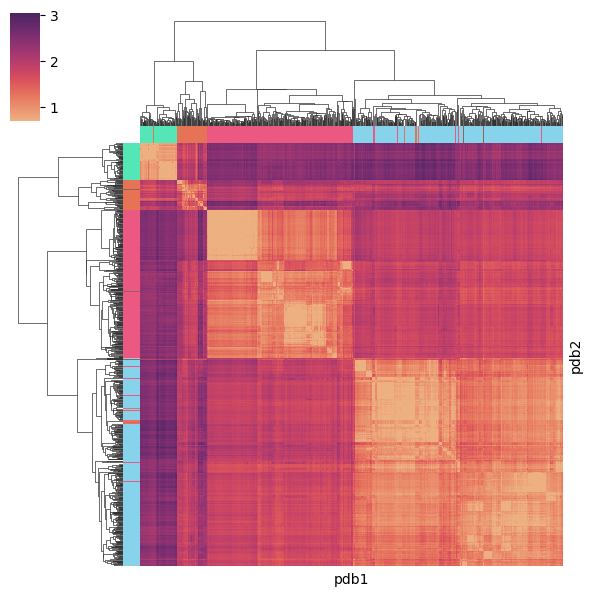

In [14]:
ddkk_usalign_matrix = ddkk_usalign.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='rmsd').dropna()


palette = {
    'nif-i': '#EB5882',
    'nif-ii': '#86D3EB',
    'nif-iii': '#E67355',
    'an': '#55E6B8',
    'other': '#8F655A'
}
colors_rows = [palette[reference_types[x]] for x in ddkk_usalign_matrix.index.to_list()]
colors_columns = [palette[reference_types[x]] for x in ddkk_usalign_matrix.columns]


g = sns.clustermap(
    data=ddkk_usalign_matrix, figsize=(6, 6), col_cluster=True, vmin=0.7, xticklabels=False, yticklabels=False,
    row_colors=colors_rows, col_colors=colors_columns, cmap='flare'
)
g.savefig('../figures/ddkk-clustermap-rmsd.svg')
g.savefig('../figures/ddkk-clustermap-rmsd.png', dpi=300)

Let's check the most-disimilar pairs.

In [19]:
ddkk_usalign.sort_values(by='rmsd', ascending=True)

,pdb1,pdb2,tm-score,tm-score2,rmsd,id1,id2,idali,l1,l2,lali
0,nsdb-000001,nsdb-000001,1.0000,1.0000,0.00,1.000,1.000,1.000,1974,1974,1974
180558,nsdb-000220,nsdb-000236,1.0000,1.0000,0.00,1.000,1.000,1.000,1980,1980,1980
180415,nsdb-000077,nsdb-000236,1.0000,1.0000,0.00,1.000,1.000,1.000,1980,1980,1980
180341,nsdb-000003,nsdb-000236,1.0000,1.0000,0.00,1.000,1.000,1.000,1980,1980,1980
179804,nsdb-000235,nsdb-000235,1.0000,1.0000,0.00,1.000,1.000,1.000,1977,1977,1977
...,...,...,...,...,...,...,...,...,...,...,...
67264,nsdb-000363,nsdb-000088,0.9409,0.8827,3.01,0.301,0.282,0.305,1848,1974,1820
277336,nsdb-000088,nsdb-000363,0.8827,0.9409,3.01,0.282,0.301,0.305,1974,1848,1820
412293,nsdb-000470,nsdb-000538,0.8829,0.9412,3.01,0.301,0.321,0.326,1974,1848,1820
544069,nsdb-000237,nsdb-000713,0.8506,0.9444,3.04,0.343,0.382,0.387,2009,1804,1781


For the remaining part of the analysis, we will consider the network emerging from generating edges above a given threshold.

## HH

In [ ]:
hh_usalign = pd.read_csv(
    '../data/hh-tm-score.csv', sep='\s+', header=None, 
    names=['pdb1', 'pdb2', 'tm-score', 'tm-score2', 'rmsd', 'id1', 'id2', 'idali', 'l1', 'l2', 'lali']
)
hh_usalign['pdb1'] = hh_usalign['pdb1'].apply(lambda x: x.split('.')[0])
hh_usalign['pdb2'] = hh_usalign['pdb2'].apply(lambda x: x.split('.')[0])

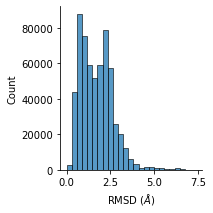

In [47]:
g = sns.displot(
    data=hh_usalign, x='rmsd', height=3, aspect=1.0, bins=25
)
g.set_xlabels('RMSD ($\AA$)')
g.savefig('../figures/hh-histogram-rmsd.svg')
g.savefig('../figures/hh-histogram-rmsd.png', dpi=300)

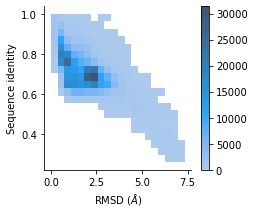

In [48]:
g = sns.displot(
    y='idali', x='rmsd', data=hh_usalign,  height=3, bins=20, cbar=True, aspect=1.2
)
g.set_ylabels('Sequence identity')
g.set_xlabels('RMSD ($\AA$)')
g.savefig('../figures/hh-histogram2D-rmsd-idali.svg')
g.savefig('../figures/hh-histogram2D-rmsd-idali.png', dpi=300)

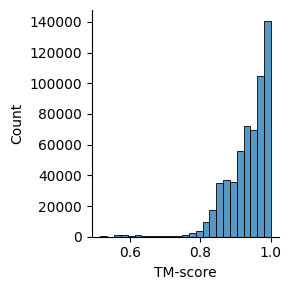

In [5]:
g = sns.displot(
    data=hh_usalign, x='tm-score2', height=3, aspect=1.0, bins=25
)
g.set_xlabels('TM-score')
# g.savefig('../figures/ddkk-histogram-tmscore.svg')
# g.savefig('../figures/ddkk-histogram-tmscore.png', dpi=300)

In [8]:
hh_usalign_matrix = hh_usalign.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='tm-score2').dropna()
hh_usalign_matrix

pdb1,nsdb-000770,nsdb-000771,nsdb-000772,nsdb-000773,nsdb-000774,nsdb-000775,nsdb-000776,nsdb-000777,nsdb-000778,nsdb-000779,...,nsdb-001529,nsdb-001530,nsdb-001531,nsdb-001532,nsdb-001533,nsdb-001534,nsdb-001535,nsdb-001536,nsdb-001537,nsdb-001538
pdb2,,,,,,,,,,,,,,,,,,,,,
nsdb-000770,1.0000,0.9969,0.9986,0.9049,0.9202,0.9834,0.9848,0.9965,0.9107,0.9594,...,0.7658,0.9874,0.9159,0.9868,0.9146,0.9969,0.9215,0.9224,0.9316,0.9844
nsdb-000771,0.9969,1.0000,0.9956,0.9160,0.9304,0.9851,0.9825,0.9950,0.9232,0.9663,...,0.7759,0.9876,0.9263,0.9872,0.9253,0.9946,0.9334,0.9325,0.9432,0.9875
nsdb-000772,0.9986,0.9956,1.0000,0.9024,0.9159,0.9806,0.9834,0.9959,0.9048,0.9553,...,0.7560,0.9859,0.9098,0.9848,0.9127,0.9974,0.9168,0.9173,0.9275,0.9824
nsdb-000773,0.9080,0.9192,0.9055,1.0000,0.9953,0.9193,0.9013,0.9007,0.9880,0.9688,...,0.8124,0.9222,0.9863,0.9160,0.9936,0.8987,0.9909,0.9902,0.9925,0.9232
nsdb-000774,0.8715,0.8809,0.8676,0.9365,1.0000,0.8845,0.8679,0.8667,0.9943,0.9280,...,0.7902,0.8860,0.9945,0.8791,0.9893,0.8634,0.9959,0.9967,0.9969,0.8929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nsdb-001534,0.9969,0.9946,0.9974,0.8956,0.9112,0.9794,0.9834,0.9983,0.9011,0.9529,...,0.7598,0.9845,0.9066,0.9835,0.9058,1.0000,0.9114,0.9124,0.9225,0.9810
nsdb-001535,0.8560,0.8664,0.8518,0.9136,0.9756,0.8710,0.8553,0.8510,0.9967,0.9124,...,0.7866,0.8699,0.9858,0.8642,0.9706,0.8470,1.0000,0.9981,0.9797,0.8797
nsdb-001536,0.8540,0.8628,0.8495,0.9100,0.9730,0.8680,0.8532,0.8495,0.9967,0.9088,...,0.7820,0.8678,0.9836,0.8621,0.9659,0.8452,0.9948,1.0000,0.9750,0.8757


In [9]:
reference = pd.read_csv('../structures/reference.csv')
reference_types = reference[['id', 'clade']].set_index('id').to_dict()['clade']

/home/bcz/miniconda3/envs/e24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/bcz/miniconda3/envs/e24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


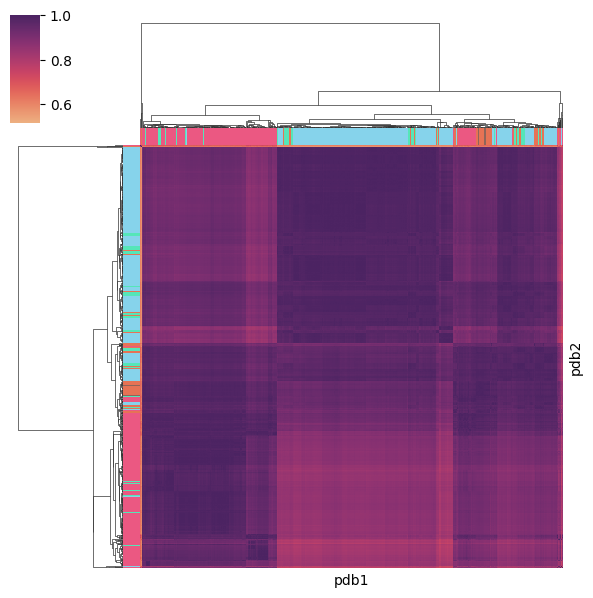

In [11]:
hh_usalign_matrix = hh_usalign.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='tm-score2').dropna()

palette = {
    'nif-i': '#EB5882',
    'nif-ii': '#86D3EB',
    'nif-iii': '#E67355',
    'an': '#55E6B8',
    'other': '#8F655A'
}
colors_rows = [palette[reference_types[x]] for x in hh_usalign_matrix.index.to_list()]
colors_columns = [palette[reference_types[x]] for x in hh_usalign_matrix.columns]

g = sns.clustermap(
    data=hh_usalign_matrix, figsize=(6, 6), col_cluster=True, xticklabels=False, yticklabels=False,
    row_colors=colors_rows, col_colors=colors_columns, cmap='flare'
)
# g.savefig('../figures/ddkk-clustermap-tmscore.svg')
# g.savefig('../figures/ddkk-clustermap-tmscore.png', dpi=300)

/home/bcz/miniconda3/envs/e24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/bcz/miniconda3/envs/e24/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


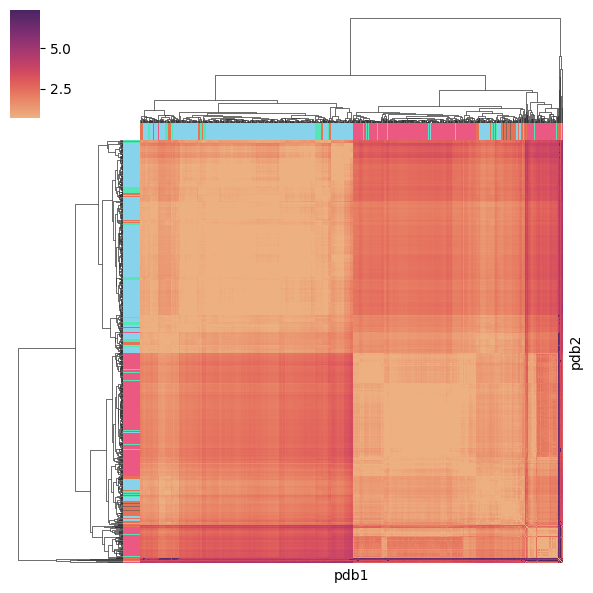

In [12]:
hh_usalign_matrix = hh_usalign.drop_duplicates(
    subset=['pdb1', 'pdb2'], keep='first'
).pivot(columns='pdb1', index='pdb2', values='rmsd').dropna()


palette = {
    'nif-i': '#EB5882',
    'nif-ii': '#86D3EB',
    'nif-iii': '#E67355',
    'an': '#55E6B8',
    'other': '#8F655A'
}
colors_rows = [palette[reference_types[x]] for x in hh_usalign_matrix.index.to_list()]
colors_columns = [palette[reference_types[x]] for x in hh_usalign_matrix.columns]


g = sns.clustermap(
    data=hh_usalign_matrix, figsize=(6, 6), col_cluster=True, vmin=0.7, xticklabels=False, yticklabels=False,
    row_colors=colors_rows, col_colors=colors_columns, cmap='flare'
)
# g.savefig('../figures/ddkk-clustermap-rmsd.svg')
# g.savefig('../figures/ddkk-clustermap-rmsd.png', dpi=300)